<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры модели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    kernel = 'linear'

    gs = GridSearchCV(SVC(), {'kernel': ['linear','rbf', 'poly'], 'degree':[2,3], 'C':[0.1,1,10,100,1000,10000]}, cv=10, n_jobs=4)
    gs.fit(x, y)
    
    model = gs.best_estimator_
    print "Trying model {}".format(model)
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.929590
Plotting data set points
Plotting decision region


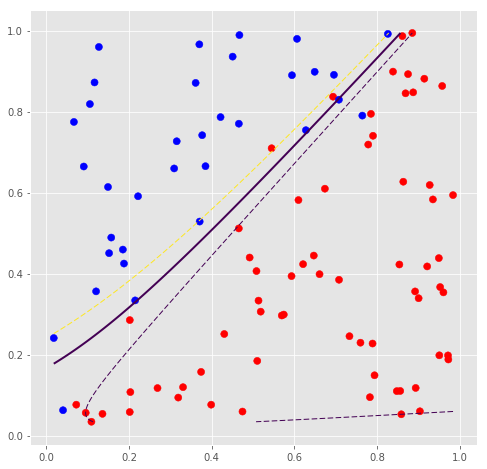

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.909926
Plotting data set points
Plotting decision region


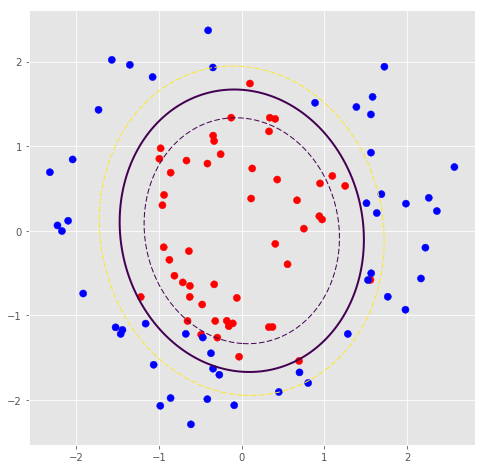

In [6]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

In [ ]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [7]:
# Your Code Here
data=pd.read_csv('titanium.csv')
data_np=np.array(data)

In [8]:
from scipy import stats
x_data=np.array(data)[:,0]

In [9]:
z_score=stats.zscore(x_data)

In [10]:
data_np[:,0]=z_score

In [11]:
X,y = data_np[:,0], data_np[:,1]
X=X.reshape(-1, 1)

In [12]:
print X.shape, y.shape

(49, 1) (49,)


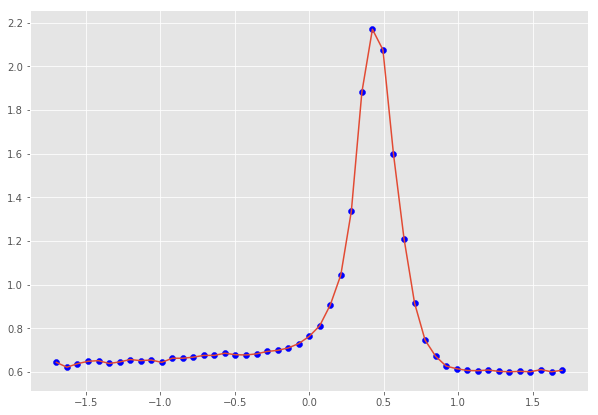

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X, y, color='blue')
plt.plot(X,y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предсказанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [14]:
from sklearn.metrics import mean_absolute_error

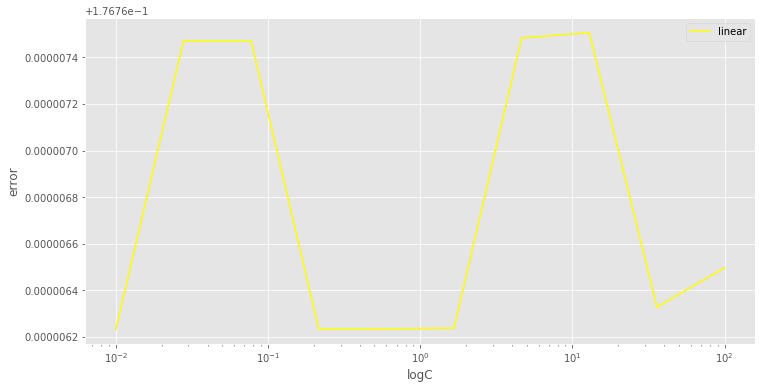

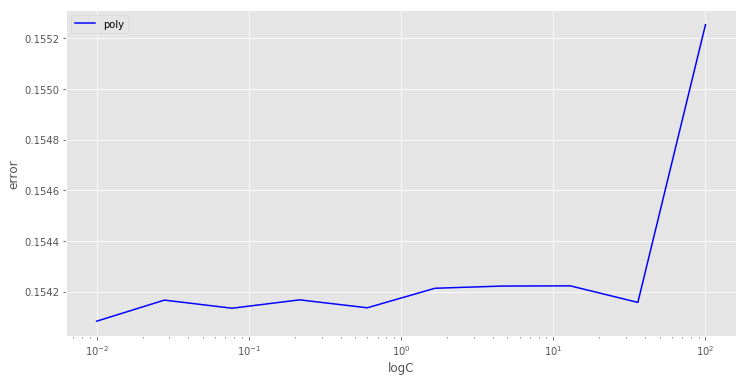

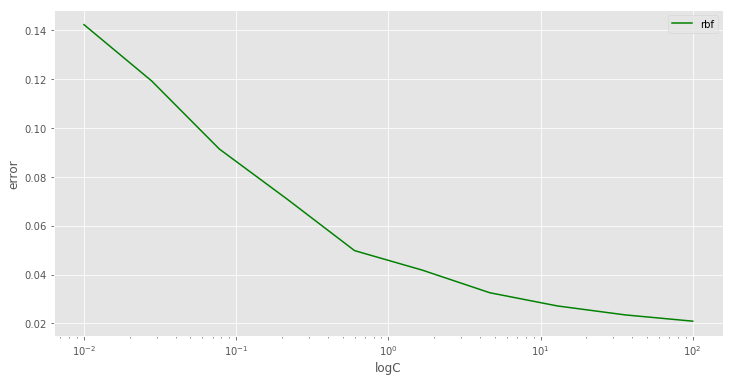

In [263]:
## Your Code Here
C = np.logspace(-2, 2, 10)
kernels=['linear','poly','rbf']
colors=['yellow', 'blue', 'green']
best_C=dict()
error_list=[]
min_error=10
for kernel, color in zip(kernels,colors):
    for c in C:
        model=SVR(kernel=kernel, C=c, degree=3, gamma=6, coef0=1, epsilon=0.01)
        model.fit(X,y)
        y_pred=model.predict(X)
        temp_error=mean_absolute_error(y_true=y, y_pred=y_pred)
        error_list.append(temp_error)
        if temp_error<min_error:
            best_C.update({kernel:c})
            min_error=temp_error
    plt.subplots()
    plt.plot(C,error_list, color=color, label=str(kernel))
    plt.xscale('log')
    plt.xlabel(u'logC')
    plt.ylabel(u'error')
    error_list=[]
    min_error=10
    plt.legend()

In [264]:
best_C

{'linear': 0.01, 'poly': 0.01, 'rbf': 100.0}

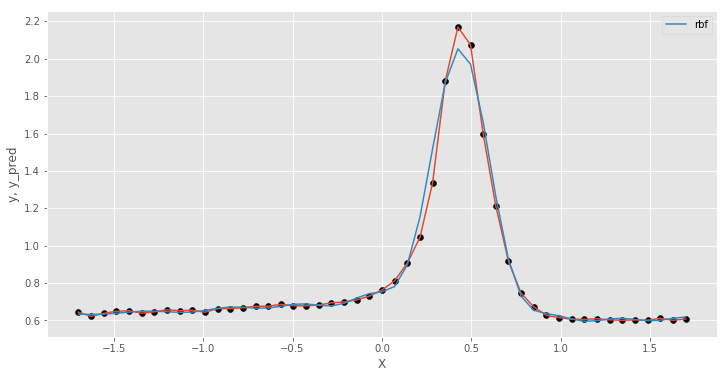

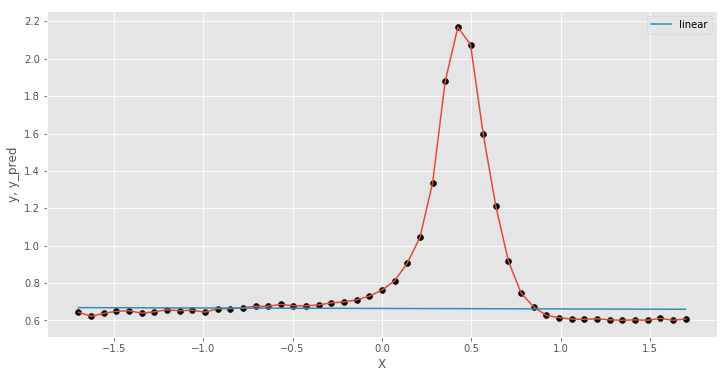

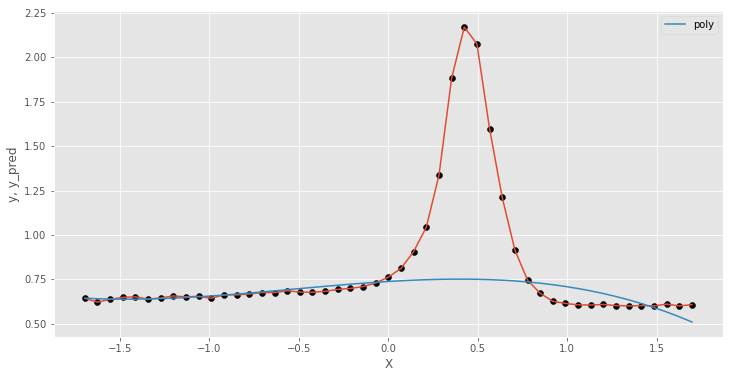

In [265]:
for key, value in best_C.iteritems():
    model=SVR(kernel=key, C=value, degree=3, gamma=6, coef0=1, epsilon=0.01)
    model.fit(X,y)
    y_pred=model.predict(X)
    plt.subplots()
    plt.scatter(X, y, color='black')
    plt.plot(X,y)
    plt.plot(X,y_pred,label=str(key))
    plt.xlabel(u'X')
    plt.ylabel(u'y, y_pred')
    plt.legend()

In [266]:
#На графиках видно следующее: в случае rbf возникает эффект переобучения, 
#в двух других случаях: linear и poly, явно наблюдается недообучение.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственное ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левенштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [112]:
## Your Code Here
df_war_es=pd.read_csv('war_and_peace_es.txt', names=['word'])
df_war_es['label']=0
df_war_en=pd.read_csv('war_and_peace_en.txt', names=['word'])
df_war_en['label']=1
df_all = pd.concat([df_war_es, df_war_en], ignore_index=True)

In [113]:
# like this

df_all.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [114]:
from sklearn.cross_validation import train_test_split

In [115]:
#1 
RND_SEED = np.random.seed(1)

In [116]:
#2
df_all = df_all.sample(n=df_all.shape[0],random_state=RND_SEED)
df_all = df_all.reset_index(drop=True)

In [119]:
#3
df=df_all.iloc[:1000,:]
X, y = np.array(df.index), np.array(df.iloc[:,1])#X - матрица индексов, y - матрица лейблов

In [120]:
#4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RND_SEED)
print ('Train: '+str(int(X_train.shape[0]/float(len(X))*100)) + '%', 'Test: '+ str(int(X_test.shape[0]/float(len(X))*100)) + '%')

('Train: 60%', 'Test: 40%')


## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [121]:
!pip install pylev

In [122]:
import pylev
from tqdm import tqdm_notebook

In [123]:
#Взял Radial basis function kernel (rbf): exp^(-|x - y|^2), где |x - y| = levenshtein(x,y)
#Построил для ста данных

In [183]:
df=df_all.iloc[:100,:]
X, y = np.array(df.index), np.array(df.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RND_SEED)

In [184]:
WORDS = list(df_all['word'])
def string_kernel(U, V):
    G = np.zeros((len(V), len(U)))
    for i in tqdm_notebook(range(len(V))):
        w2 = WORDS[V[i]]
        for j in range(len(U)):
            w1 = WORDS[U[j]]
            G[i][j] = np.exp(-pylev.levenshtein(w1, w2)**2)
    G = np.array(G)
    return G

In [185]:
G = string_kernel(X_train, X_train)

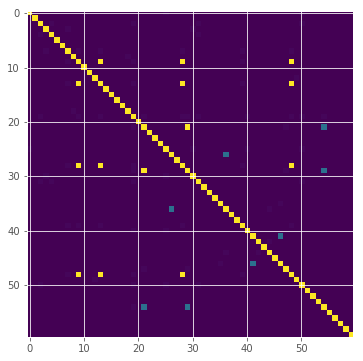

In [186]:
plt.imshow(G)

In [193]:
#Построим для четырех тысяч данных
df=df_all.iloc[:4000,:]
X, y = np.array(df.index), np.array(df.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RND_SEED)

In [194]:
G_train = string_kernel(X_train, X_train)

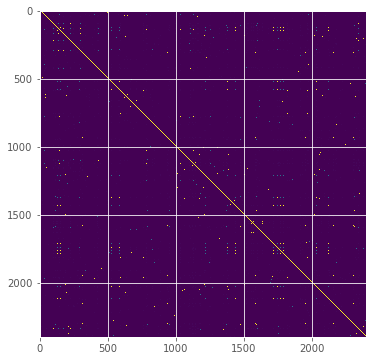

In [195]:
plt.imshow(G_train)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [196]:
from sklearn.metrics import accuracy_score

In [197]:
G_test=string_kernel(X_train, X_test)#чтобы не считать в цикле по нескольку раз

In [198]:
# Your Code Here
C = np.logspace(-2, 2, 10)
for c in C:
    model=SVC(kernel="precomputed", C=c)
    model.fit(G_train, y_train)
    y_pred=model.predict(G_test)
    print ('Качество на тестовой выборке равно '+str(accuracy_score(y_test, y_pred))+' при C = %f' %c)

Качество на тестовой выборке равно 0.555 при C = 0.010000
Качество на тестовой выборке равно 0.603125 при C = 0.027826
Качество на тестовой выборке равно 0.68 при C = 0.077426
Качество на тестовой выборке равно 0.74 при C = 0.215443
Качество на тестовой выборке равно 0.8325 при C = 0.599484
Качество на тестовой выборке равно 0.84875 при C = 1.668101
Качество на тестовой выборке равно 0.84875 при C = 4.641589
Качество на тестовой выборке равно 0.84875 при C = 12.915497
Качество на тестовой выборке равно 0.84875 при C = 35.938137
Качество на тестовой выборке равно 0.84875 при C = 100.000000
